<a href="https://colab.research.google.com/github/SrishtiShetty24/ZaraStocks_TimeSeriesForecast/blob/main/Zara_GroupProject_FoBA_finalgroupproject_timeseriesforecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Forecasting - Final Project


## Import libraries

In [ ]:
## Import libraries
import pandas as pd
from prophet import Prophet
from google.colab import auth
from google.auth import default
import gspread

## Import data

### For all groups besides DJI
If you are the DJI group, do NOT run this code block.

In [ ]:
import yfinance as yf

# Replace 'SHOP' with your company's stock ticker
ticker = 'ITX.MC'
# Shopify: 'SHOP'
# Zara: 'ITX.MC' (Zara's parent company)
# Pfizer: 'PFE'
# Unilever: 'UL'


# Download daily stock data for the past 3 years
df = yf.download(ticker, start='2022-05-01', end='2025-05-04')

# rename columns
df = df[['Close']].reset_index()
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Keep only the date and closing price
df.columns = ['ds', 'y']

# Show the first few rows
print(df.head())

[*********************100%***********************]  1 of 1 completed

          ds          y
0 2022-05-02  18.635294
1 2022-05-03  18.940638
2 2022-05-04  18.820349
3 2022-05-05  19.320005
4 2022-05-06  18.737078


## Use Prophet and create forecast

In [ ]:
# PLACEHOLDER CODE FOR CASES WHERE YOU MAY WANT TO EXCLUDE CERTAIN DATES
#df.loc[(df['ds'] > '2021-11-16') & (df['ds'] < '2021-11-19'), 'y'] = None

# ADJUST WHETHER YOU NEED WEEKLY AND/OR DAILY SEASONALITY BASED ON GRAIN OF DATASET
m = Prophet(yearly_seasonality=True, weekly_seasonality=True) #, daily_seasonality=True)
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wtc8t57/kcwrg508.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wtc8t57/49wwujle.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63257', 'data', 'file=/tmp/tmp8wtc8t57/kcwrg508.json', 'init=/tmp/tmp8wtc8t57/49wwujle.json', 'output', 'file=/tmp/tmp8wtc8t57/prophet_model8p1ld5e6/prophet_model-20250505201725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:17:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:17:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
## VALUE YOU PUT IN THIS IS THE NUMBER OF TIME PERIODS FORWARD YOU'LL BE FORECASTING
future = m.make_future_dataframe(periods= 240) # [ADD A NUMBER HERE])
future.tail()

,ds
1004,2025-12-24
1005,2025-12-25
1006,2025-12-26
1007,2025-12-27
1008,2025-12-28


In [ ]:
forecast = m.predict(future)
for col in ['yhat', 'yhat_lower', 'yhat_upper']:
    forecast[col] = forecast[col].clip(lower=0.0)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

output_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
output_df

,ds,yhat,yhat_lower,yhat_upper
0,2022-05-02,20.091414,18.275103,21.907885
1,2022-05-03,20.090288,18.376070,21.789836
2,2022-05-04,20.096469,18.379934,21.784238
3,2022-05-05,20.016409,18.186438,21.725269
4,2022-05-06,19.907767,18.194586,21.632900
...,...,...,...,...
1004,2025-12-24,43.213408,35.941021,49.930132
1005,2025-12-25,43.152733,35.965058,49.791629
1006,2025-12-26,43.085953,35.539099,50.288996
1007,2025-12-27,42.058792,34.636063,48.973716


## Visualize

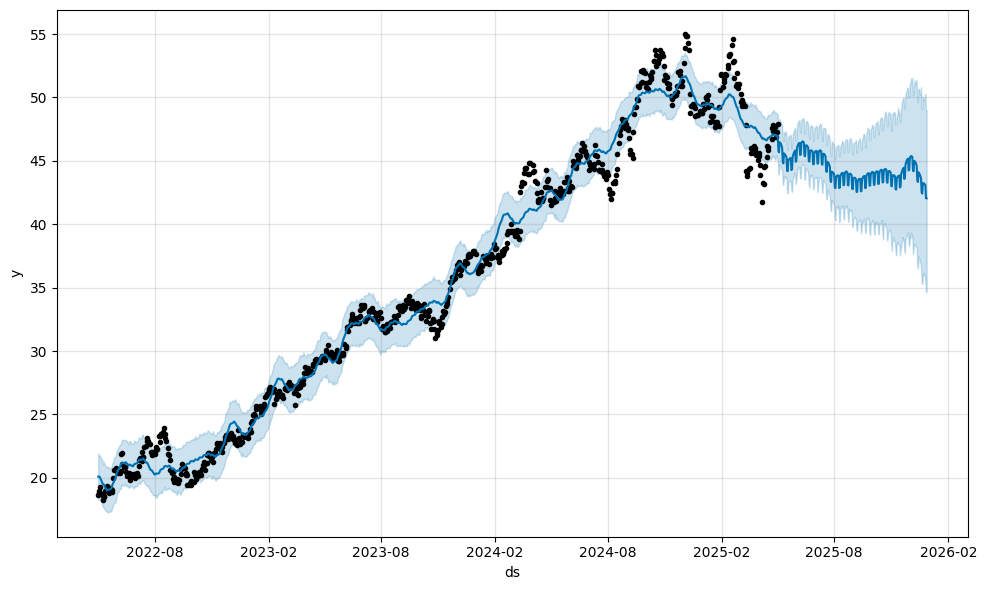

In [ ]:
fig1 = m.plot(forecast)


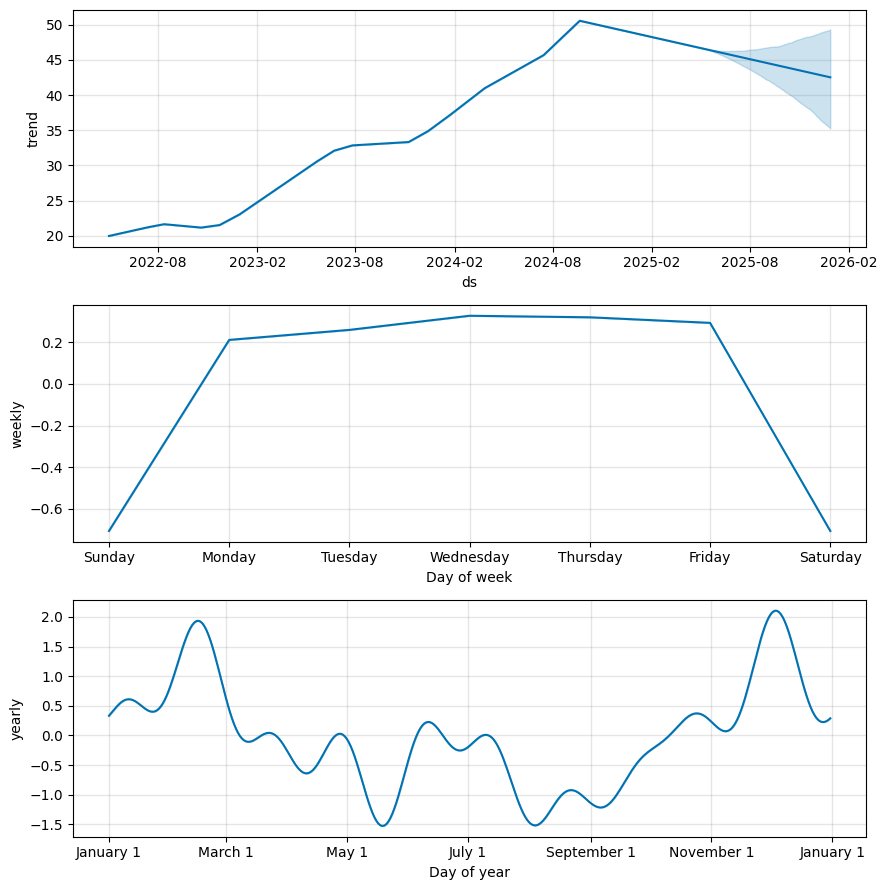

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
# from prophet.plot import plot_plotly, plot_components_plotly

# plot_plotly(m, forecast)

from prophet.plot import plot_plotly, plot_components_plotly

fig = plot_plotly(m, forecast)
fig.update_layout(
    plot_bgcolor="rgba(0, 0, 0, 0)",  # fully transparent plot background
    paper_bgcolor="rgba(0, 0, 0, 0)",  # fully transparent plot paper (outer) background
    yaxis=dict(
      tickformat=',',  # format y-axis labels with commas
      title= "Daily app installs"
    ),
)
fig.show()

In [ ]:
fig_components = plot_components_plotly(m, forecast)
fig_components.update_layout(
    plot_bgcolor="rgba(0, 0, 0, 0)",  # fully transparent plot background
    paper_bgcolor="rgba(0, 0, 0, 0)",  # fully transparent plot paper (outer) background
)
fig_components.show()

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='180 days', period='90 days', horizon = '180 days')

from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:prophet:Making 9 forecasts with cutoffs between 2022-11-14 00:00:00 and 2024-11-03 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wtc8t57/7d42pxa3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wtc8t57/v5hadeqe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58590', 'data', 'file=/tmp/tmp8wtc8t57/7d42pxa3.json', 'init=/tmp/tmp8wtc8t57/v5hadeqe.json', 'output', 'file=/tmp/tmp8wtc8t57/prophet_model06oadpoh/prophet_model-20250505201743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:17:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:17:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wtc8t57/dbpbmxv9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wtc8t57/fmsip1gv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,18 days,13.760918,3.709571,2.338098,0.074993,0.035988,0.086523,0.396966
1,19 days,14.209708,3.769577,2.425827,0.077653,0.040503,0.089337,0.393173
2,20 days,14.271772,3.777800,2.433122,0.078024,0.039886,0.089782,0.399494
3,21 days,18.310814,4.279114,2.645900,0.086591,0.039886,0.104972,0.384324
4,22 days,23.042729,4.800284,2.924188,0.096985,0.044620,0.123208,0.356932


Exercise: Use Colab's built-in code explainer to better understand what the cross-validation code above is doing

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



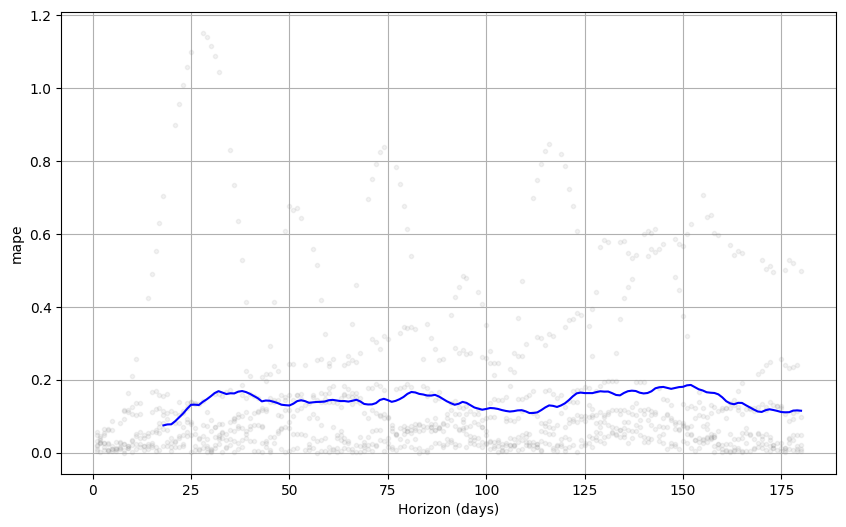

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')